Data set link : http://archive.ics.uci.edu/ml/datasets/Auto+MPG

In [10]:
file = r'C:\Users\sri\Desktop\auto_mpg\auto-mpg.data'

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(file,names=cols, na_values='?',comment='\t',
                   sep=" ",
                   skipinitialspace=True)

data = df.copy()

In [14]:
data.sample(20)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
246,32.8,4,78.0,52.0,1985.0,19.4,78,3
176,19.0,6,232.0,90.0,3211.0,17.0,75,1
284,20.6,6,225.0,110.0,3360.0,16.6,79,1
201,18.5,6,250.0,110.0,3645.0,16.2,76,1
128,15.0,6,250.0,100.0,3336.0,17.0,74,1
110,22.0,4,108.0,94.0,2379.0,16.5,73,3
143,26.0,4,97.0,78.0,2300.0,14.5,74,2
289,16.9,8,350.0,155.0,4360.0,14.9,79,1
279,29.5,4,98.0,68.0,2135.0,16.6,78,3
254,20.2,6,200.0,85.0,2965.0,15.8,78,1


## Problem Statement:
The data contains MPG variable which is continuous data and tells us about the efficiency of fuel consumption of a vehicle in 70s and 80s.

Our aim here is to predict the MPG value for a vehicle given we have other attributes of that vehicle.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 24.9 KB


In [16]:
data.shape

(398, 8)

In [17]:
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [18]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<AxesSubplot:xlabel='Horsepower'>

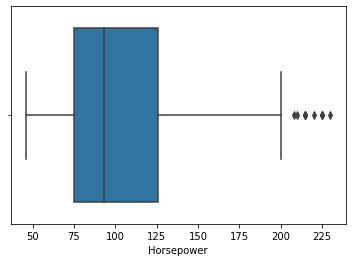

In [19]:
sns.boxplot(x=data['Horsepower'])

In [20]:
#Inputing the missing values in the Horsepower column with median

median = df.Horsepower.median()
data.Horsepower = data.Horsepower.fillna(median)

In [21]:
#we can check now there are no missing values
data.Horsepower.isnull().sum()

0

In [22]:
# Category Distribution
data['Cylinders'].value_counts()/len(data)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [23]:
data.Origin.value_counts()/len(data)

1    0.625628
3    0.198492
2    0.175879
Name: Origin, dtype: float64

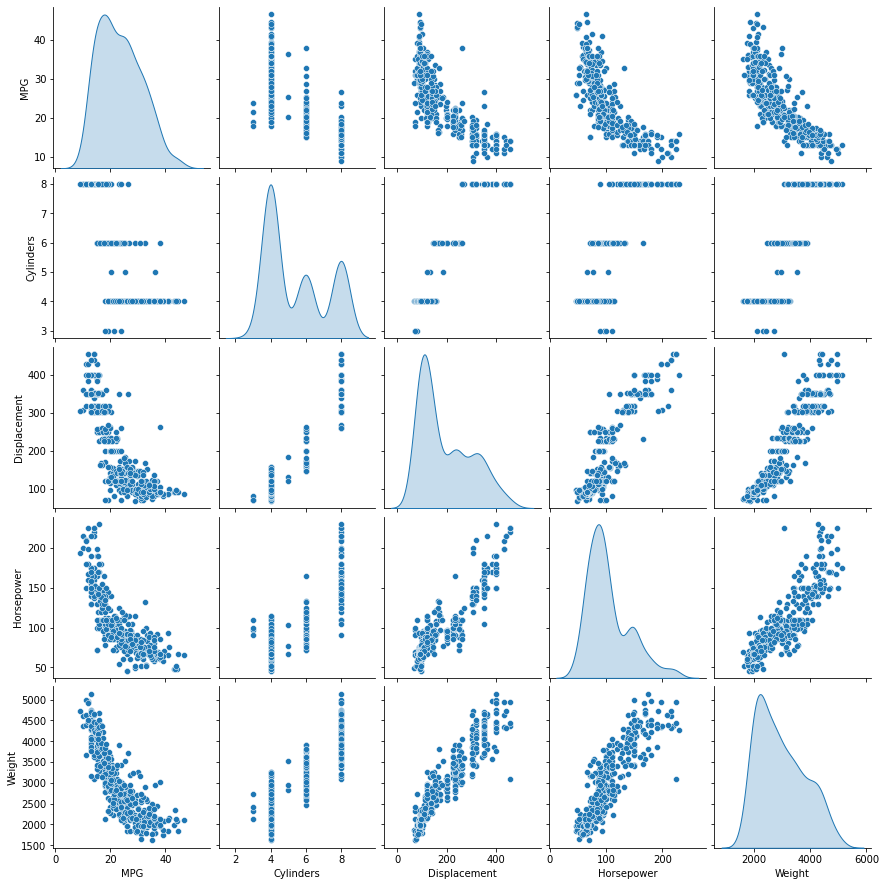

In [24]:
#pairplot to get an intuition of potential correlation
sns.pairplot(data[['MPG','Cylinders','Displacement','Horsepower','Weight']],diag_kind="kde")

# Data Preperation

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
warnings.filterwarnings('ignore')

In [26]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

# Segregating Target and Feature Variables

In [27]:
data = strat_train_set.drop('MPG',axis=1)
data_labels = strat_train_set['MPG'].copy()

## Preprocessing the Origin Column

In [28]:
def preprocess_origin_cols(df):
    df['Origin'] = df['Origin'].map({1:'India', 2: 'USA',3:'Germany'})
    return df

data_tr = preprocess_origin_cols(data)

In [29]:
data_tr.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,Germany
151,4,79.0,67.0,2000.0,16.0,74,USA
388,4,156.0,92.0,2585.0,14.5,82,India
48,6,250.0,88.0,3139.0,14.5,71,India
114,4,98.0,90.0,2265.0,15.5,73,USA


In [30]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    int64  
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    int64  
 6   Origin        318 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 18.6+ KB


In [31]:
data_tr.isnull().sum()

Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [32]:
# isolating the origin column
data_cat = data_tr[['Origin']]
data_cat.head()

,Origin
145,Germany
151,USA
388,India
48,India
114,USA


In [33]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot #Returns a sparse matrix

<318x3 sparse matrix of type '<class 'numpy.float64'>'
	with 318 stored elements in Compressed Sparse Row format>

In [34]:
data_cat_1hot.toarray()[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [35]:
cat_encoder.categories_

[array(['Germany', 'India', 'USA'], dtype=object)]

# Handling Missing Values using SimpleImputer

In [38]:
num_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
145,4,83.0,61.0,2003.0,19.0,74
151,4,79.0,67.0,2000.0,16.0,74
388,4,156.0,92.0,2585.0,14.5,82
48,6,250.0,88.0,3139.0,14.5,71
114,4,98.0,90.0,2265.0,15.5,73


In [37]:
## Segregating the numerical columns
num_data = data.iloc[:,:-1]
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    int64  
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 17.4 KB


In [39]:
# handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median') #we can use mean mode and many more...
imputer.fit(num_data)

SimpleImputer(strategy='median')

In [40]:
# median of all columns from imputer
imputer.statistics_

array([   4. ,  146. ,   93.5, 2844. ,   15.5,   76. ])

In [41]:
# median from pandas data frame

data.median().values

array([   4. ,  146. ,   93.5, 2844. ,   15.5,   76. ])

In [42]:
# Mean of the all the colums

data.mean().values

array([   5.45283019,  192.40880503,  103.71069182, 2977.08176101,
         15.63867925,   75.99685535])

In [43]:
#imputing the missing values by transforming the dataframe
X = imputer.transform(num_data)
X

array([[   4. ,   83. ,   61. , 2003. ,   19. ,   74. ],
       [   4. ,   79. ,   67. , 2000. ,   16. ,   74. ],
       [   4. ,  156. ,   92. , 2585. ,   14.5,   82. ],
       ...,
       [   4. ,  135. ,   84. , 2295. ,   11.6,   82. ],
       [   4. ,  113. ,   95. , 2372. ,   15. ,   70. ],
       [   6. ,  146. ,  120. , 2930. ,   13.8,   81. ]])

In [44]:
# Converting 2D array back into dataframe
data_tr = pd.DataFrame(X, columns= num_data.columns, index= num_data.index)
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    float64
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    float64
dtypes: float64(6)
memory usage: 17.4 KB


# Adding Attributes using BaseEstimator and Transformer

In [45]:
num_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
145,4,83.0,61.0,2003.0,19.0,74
151,4,79.0,67.0,2000.0,16.0,74
388,4,156.0,92.0,2585.0,14.5,82
48,6,250.0,88.0,3139.0,14.5,71
114,4,98.0,90.0,2265.0,15.5,73


In [46]:
from sklearn.base import BaseEstimator, TransformerMixin

acc_ix, hpower_ix, cyl_ix = 4, 2, 0

class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True): # no *args or **kargs
        self.acc_on_power = acc_on_power
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix]
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl]
        
        return np.c_[X, acc_on_cyl] # This ".c_" will concatenate the two parameters provided
    
attr_adder = CustomAttrAdder(acc_on_power=True)
data_tr_extra_attrs = attr_adder.transform(data_tr.values)
data_tr_extra_attrs[0]

array([4.0000000e+00, 8.3000000e+01, 6.1000000e+01, 2.0030000e+03,
       1.9000000e+01, 7.4000000e+01, 3.1147541e-01, 4.7500000e+00])

# Create a Pipeline of tasks

In [47]:
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)

data = df.copy()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [48]:
data = strat_train_set.drop("MPG", axis=1)
data_labels = strat_train_set["MPG"].copy()
data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2
...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,2
156,8,400.0,170.0,4668.0,11.5,75,1
395,4,135.0,84.0,2295.0,11.6,82,1
14,4,113.0,95.0,2372.0,15.0,70,3


In [49]:
from sklearn.pipeline import Pipeline
##Using StandardScaler to scale all the numerical attributes
from sklearn.preprocessing import StandardScaler

def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    numerics = ['float64', 'int64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline

# Transforming Numerical and Categorical Attributes

In [50]:
from sklearn.compose import ColumnTransformer

def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["Origin"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

# From Raw data to processed data in 2 steps

In [51]:
preprocessed_df = preprocess_origin_cols(data)
prepared_data = pipeline_transformer(preprocessed_df)

In [52]:
prepared_data[0]

array([-0.85657842, -1.07804475, -1.15192977, -1.17220298,  1.21586943,
       -0.54436373,  1.70952741,  1.29565517,  1.        ,  0.        ,
        0.        ])

# Selecting and Training Models

In [53]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(prepared_data, data_labels)

LinearRegression()

In [54]:
# testing the predictions with test data
sample_data = data.iloc[:5]
sample_labels = data_labels.iloc[:5]

sample_data_processed = pipeline_transformer(sample_data)

print('Prediction of samples:', lin_reg.predict(sample_data_processed))

Prediction of samples: [29.08069379 27.78336755 26.08031176 12.70419279 22.23454159]


In [55]:
print('Actual Labels of samples:', list(sample_labels))

Actual Labels of samples: [32.0, 31.0, 26.0, 18.0, 26.0]


# Mean Squared Error

If there are more outliers in your data, It's best to use "Absolute Error".

In [56]:
from sklearn.metrics import mean_squared_error

mpg_predictions = lin_reg.predict(prepared_data)
lin_mse = mean_squared_error(data_labels, mpg_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.9590402225760872

# Decision tree

In [57]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(prepared_data, data_labels)

DecisionTreeRegressor()

In [58]:
mpg_predictions = tree_reg.predict(prepared_data)
tree_mse = mean_squared_error(data_labels, mpg_predictions)
print(tree_mse)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0


0.0

But no model is perfect, this means that our model has overfit the data to a great extent.

We won't be touching out test data until we finalize our model. So, how do we check for what's happening?

# Model Evaluation using Cross Validation
Scikit-Learn’s **K-fold cross-validation** feature randomly splits the training set into K distinct subsets called folds, then it trains and evaluates the model K times, picking a different fold for evaluation every time and training on the other K-1 folds.

The result is an array containing the K evaluation scores:

In [59]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,
                          prepared_data,
                          data_labels,
                          scoring = 'neg_mean_squared_error', # It's Basically negative Mean squared error.
                          cv=10)                              #Just to mention the error negatively.

tree_reg_rmse_scores = np.sqrt(-scores) #as the values are computed negatively, we add '-ve' to make the error positive

In [60]:
tree_reg_rmse_scores

array([2.94772158, 2.83333946, 3.01765638, 3.2574434 , 2.21387669,
       2.87304281, 3.79044852, 5.47956431, 4.15494265, 2.54925669])

In [61]:
tree_reg_rmse_scores.mean()

3.31172924820939

In [62]:
scores = cross_val_score(lin_reg,
                         prepared_data,
                         data_labels,
                         scoring='neg_mean_squared_error',
                         cv=10)
lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse_scores

array([3.43254597, 3.45962304, 3.66031739, 2.59652976, 2.48023405,
       2.77343662, 3.32524647, 2.39606515, 3.78133275, 2.8573747 ])

In [63]:
lin_reg_rmse_scores.mean()

3.076270589533085

# Random Forest model

In [64]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_data,data_labels)
forest_reg_cv_scores =  cross_val_score(forest_reg,prepared_data,data_labels,scoring='neg_mean_squared_error',cv=10)

forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
forest_reg_rmse_scores.mean()

2.5715210703297045

# Support Vector Machine Regressor

In [65]:
from sklearn.svm import SVR

svm_reg = SVR()
svm_reg.fit(prepared_data, data_labels)
svm_cv_scores = cross_val_score(svm_reg, prepared_data, data_labels, scoring='neg_mean_squared_error',cv=10)
svm_rmse_scores = np.sqrt(-svm_cv_scores)
svm_rmse_scores.mean()

3.164117785619293

# HyperParameter Tuning using GridSearchCv

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(prepared_data, data_labels)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [67]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 10}

In [68]:
cv_scores = grid_search.cv_results_

##printing all the parameters along with their scores
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(np.sqrt(-mean_score), params)

3.251961532405285 {'max_features': 2, 'n_estimators': 3}
3.119829630829739 {'max_features': 2, 'n_estimators': 10}
2.866681233183623 {'max_features': 2, 'n_estimators': 30}
3.2324696773602946 {'max_features': 4, 'n_estimators': 3}
2.855015989517961 {'max_features': 4, 'n_estimators': 10}
2.7723968811924964 {'max_features': 4, 'n_estimators': 30}
3.096291283658831 {'max_features': 6, 'n_estimators': 3}
2.885495291037013 {'max_features': 6, 'n_estimators': 10}
2.725474705248906 {'max_features': 6, 'n_estimators': 30}
3.1971273193099665 {'max_features': 8, 'n_estimators': 3}
2.704762932340151 {'max_features': 8, 'n_estimators': 10}
2.739003354119876 {'max_features': 8, 'n_estimators': 30}
3.385626308645435 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.0974410842114963 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.235295830817211 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.8305471676241614 {'bootstrap': False, 'max_features': 3, 'n_estimators

# Checking Feature Importance

In [69]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([0.23369548, 0.26192926, 0.16504342, 0.16055405, 0.01169776,
       0.12358165, 0.01864092, 0.01759373, 0.00485487, 0.0016524 ,
       0.00075647])

In [70]:
extra_attrs = ["acc_on_power", "acc_on_cyl"]
numerics = ['float64', 'int64']
num_attrs = list(data.select_dtypes(include=numerics))

attrs = num_attrs + extra_attrs
sorted(zip(attrs, feature_importance), reverse=True)

[('acc_on_power', 0.018640917829174146),
 ('acc_on_cyl', 0.017593729967447007),
 ('Weight', 0.1605540538270586),
 ('Model Year', 0.12358164502778421),
 ('Horsepower', 0.16504341620139304),
 ('Displacement', 0.26192925764441594),
 ('Cylinders', 0.23369547693015078),
 ('Acceleration', 0.011697758974942738)]

# Evaluating the entire system on Test Data

In [71]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("MPG", axis=1)
y_test = strat_test_set["MPG"].copy()

X_test_preprocessed = preprocess_origin_cols(X_test)
X_test_prepared = pipeline_transformer(X_test_preprocessed)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [72]:
final_rmse

3.315315030279929

# Creating a function to cover this entire flow

In [73]:
def predict_mpg(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
    preproc_df = preprocess_origin_cols(df)
    prepared_df = pipeline_transformer(preproc_df)
    y_pred = model.predict(prepared_df)
    return y_pred

In [74]:
##checking it on a random sample
vehicle_config = {
    'Cylinders': [4, 6, 8],
    'Displacement': [155.0, 160.0, 165.5],
    'Horsepower': [93.0, 130.0, 98.0],
    'Weight': [2500.0, 3150.0, 2600.0],
    'Acceleration': [15.0, 14.0, 16.0],
    'Model Year': [81, 80, 78],
    'Origin': [3, 2, 1]
}

predict_mpg(vehicle_config, final_model)

array([32.08, 19.62, 19.19])

# Save the Model

In [75]:
import pickle

In [76]:
##saving the model
with open("model.bin", 'wb') as f_out:
    pickle.dump(final_model, f_out)
    f_out.close()

In [77]:
#loading the model from the saved file
with open('model.bin', 'rb') as f_in:
    model = pickle.load(f_in)

predict_mpg(vehicle_config, model)

array([32.08, 19.62, 19.19])

In [80]:
import requests

url = 'http://192.168.205.100:9696/'
r = requests.post(url, json=vehicle_config)
r.text.strip()

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"\n  "http://www.w3.org/TR/html4/loose.dtd">\n<html>\n  <head>\n    <title>TypeError: &#x27;method&#x27; object is not subscriptable // Werkzeug Debugger</title>\n    <link rel="stylesheet" href="?__debugger__=yes&amp;cmd=resource&amp;f=style.css"\n        type="text/css">\n    <!-- We need to make sure this has a favicon so that the debugger does\n         not accidentally trigger a request to /favicon.ico which might\n         change the application\'s state. -->\n    <link rel="shortcut icon"\n        href="?__debugger__=yes&amp;cmd=resource&amp;f=console.png">\n    <script src="?__debugger__=yes&amp;cmd=resource&amp;f=debugger.js"></script>\n    <script type="text/javascript">\n      var TRACEBACK = 197155328,\n          CONSOLE_MODE = false,\n          EVALEX = true,\n          EVALEX_TRUSTED = false,\n          SECRET = "E0jXM4fO6iEka6z14Stn";\n    </script>\n  </head>\n  <body style="background-color: #fff">\n    <div